## Exploratory Data Analysis and Data Preperation for a Customer Churn Dataset

### Introduction
In this example we show how to do Exploratory Data Analysis, Data Preparation and Feature Engineering for a dataset describing customer churn for a retail bank.

## Disclaimer

By accessing this code, you acknowledge the code is made available for presentation and demonstration purposes only and that the code (1) is not subject to SOC 1 and SOC 2 compliance audits, and (2) is not designed or intended to be a substitute for the professional advice, diagnosis, treatment, or judgment of a certified financial services professional. Do not use this code to replace, substitute, or provide professional financial advice, or judgement. You are solely responsible for ensuring the regulatory, legal, and/or contractual compliance of any use of the code, including obtaining any authorizations or consents, and any solution you choose to build that incorporates this code in whole or in part.

© 2021 Microsoft Corporation. All rights reserved

## Importing required libraries and setting up connection to Blob storage

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from azure.storage.blob import ContainerClient, BlobClient
import pandas as pd
from io import BytesIO

CONNECTIONSTRING = 'DefaultEndpointsProtocol=https;AccountName=stfsiprod;AccountKey=WVrgvqHHELb6+XKiurG3qiPyNf48vF2L5LGpQPtR5n2J6VHPdSex6VN1H7a+73PNFRomme11g/1mVdl32kBiLA==;EndpointSuffix=core.windows.net'
CONTAINER_NAME = 'retail-banking-customer-churn'

BLOBNAME = 'retail_banking_customer_churn_data.csv'
blob = BlobClient.from_connection_string(conn_str=CONNECTIONSTRING, container_name=CONTAINER_NAME, blob_name=BLOBNAME)
blob_data = blob.download_blob()
BytesIO(blob_data.content_as_bytes())
data = pd.read_csv(BytesIO(blob_data.content_as_bytes()))

StatementMeta(SparkChurn, 85, 2, Finished, Available)

## Exploratory Data Analysis

This is the initial step in Data Analysis. We are going to go through our data and try to understand it. The first thing we need to do is look at the "head" of the data.  The head is just the first couple rows.  This will give us a good idea of what the dataset "looks" like.



In [3]:
pd.set_option('display.max_columns',999) # show all columns
data.head(8) # show first 8 rows of data

StatementMeta(SparkChurn, 85, 3, Finished, Available)

   age          job  marital            education  default housing loan  \
0   56    housemaid  married             basic.4y       no      no   no   
1   57     services  married          high.school  unknown      no   no   
2   37     services  married          high.school       no     yes   no   
3   40       admin.  married             basic.6y       no      no   no   
4   56     services  married          high.school       no      no  yes   
5   45     services  married             basic.9y  unknown      no   no   
6   59       admin.  married  professional.course       no      no   no   
7   41  blue-collar  married              unknown  unknown      no   no   

     contact month day_of_week  duration  campaign  pdays  previous  \
0  telephone   may         mon       261         1    999         0   
1  telephone   may         mon       149         1    999         0   
2  telephone   may         mon       226         1    999         0   
3  telephone   may         mon       151

## Checking for missing data
Next we will check for missing values in the data.  Missing values in the data will not allow us to properly analyze the data.

In [4]:
data.isnull().sum()

StatementMeta(SparkChurn, 85, 4, Finished, Available)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Data types and shape
There were no empty cells in the dataset. Next we're going to look at the "shape" of the dataset which is just the number of rows and columns.


We will also look at the data types.  This will help us when making decisions about analysis and our modeling.

In [5]:
data.shape

StatementMeta(SparkChurn, 85, 5, Finished, Available)

(41188, 21)

In [6]:
data.dtypes

StatementMeta(SparkChurn, 85, 6, Finished, Available)

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

## Change data types
After looking at our data types we see that some of them are not what we would like them to be.  

Next we will cast most of these columns to categorical data types. The target column 'y' will be cast to an integer and given the value 1 and 0.  This will make our analysis and modeling much easier.

In [7]:
data['job'] = data.job.astype('category')
data['marital'] = data.marital.astype('category')
data['education'] = data.education.astype('category')
data['default'] = data.default.astype('category')
data['housing'] = data.housing.astype('category')
data['loan'] = data.loan.astype('category')
data['contact'] = data.contact.astype('category')
data['month'] = data.month.astype('category')
data['day_of_week'] = data.day_of_week.astype('category')
data['poutcome'] = data.poutcome.astype('category')
data['y'] = data['y'].map({'yes': 1, 'no': 0}) #Making this numerical for analysis purposes

StatementMeta(SparkChurn, 85, 7, Finished, Available)

## Analysis

Now that the data has been cleaned we are ready to analyze.  This first thing we'll look at is the customer's age density.  This will show us the distribution of our customers' age.

StatementMeta(SparkChurn, 85, 8, Finished, Available)

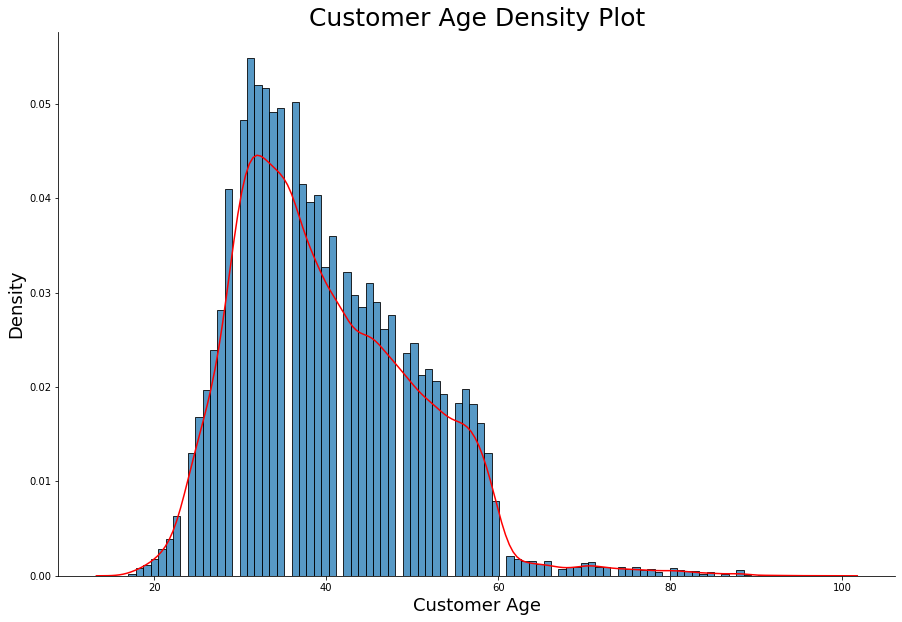

In [8]:
plt.figure(figsize=(15,10))
ax = sns.histplot(data['age'], palette='Blues', stat='density',legend=True) #Histogram for customer age
sns.kdeplot(data['age'], color='red',legend=True) #Density plot
sns.despine() #removing top and right borders
ax.set_title('Customer Age Density Plot',fontsize=25)
ax.set_xlabel('Customer Age', fontsize=18)
ax.set_ylabel('Density', fontsize=18)
plt.show()

## Customer Retention Analysis

The next few graphs help us understand our customer churn based on different demographic data.

StatementMeta(SparkChurn, 85, 9, Finished, Available)

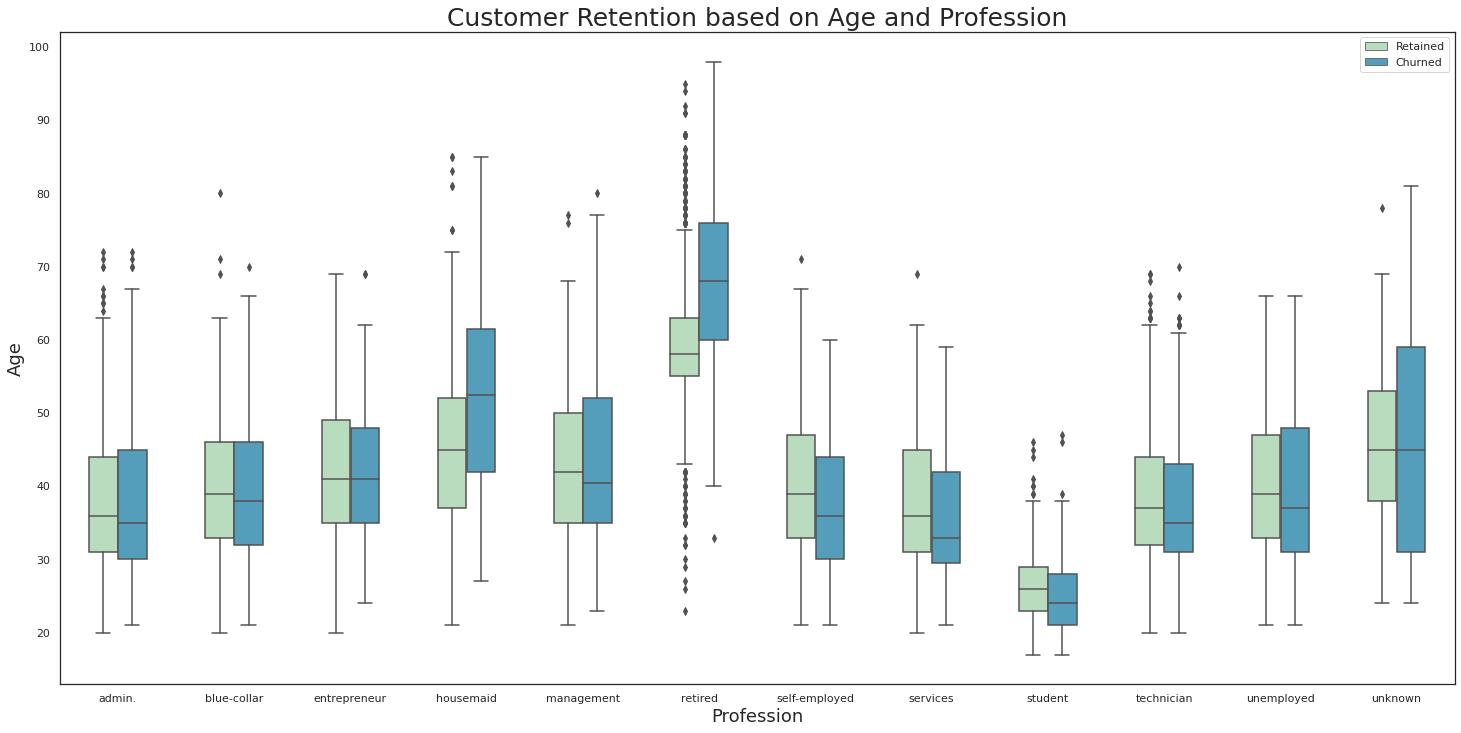

In [9]:
#Customer Retention Based on Age and Profession
sns.set(style="white") #Making background white
plt.figure(figsize=(25,12)) #Setting figure size
ax = sns.boxplot(x="job", y="age", hue="y", data=data, palette="GnBu", width=0.5) #Creating boxplot and setting color palette
handles, _= ax.get_legend_handles_labels()#Changing legend
ax.legend(handles, ["Retained", "Churned"])
ax.set_title('Customer Retention based on Age and Profession',fontsize=25)
ax.set_xlabel('Profession', fontsize=18)
ax.set_ylabel('Age', fontsize=18)
plt.show()

StatementMeta(SparkChurn, 85, 10, Finished, Available)

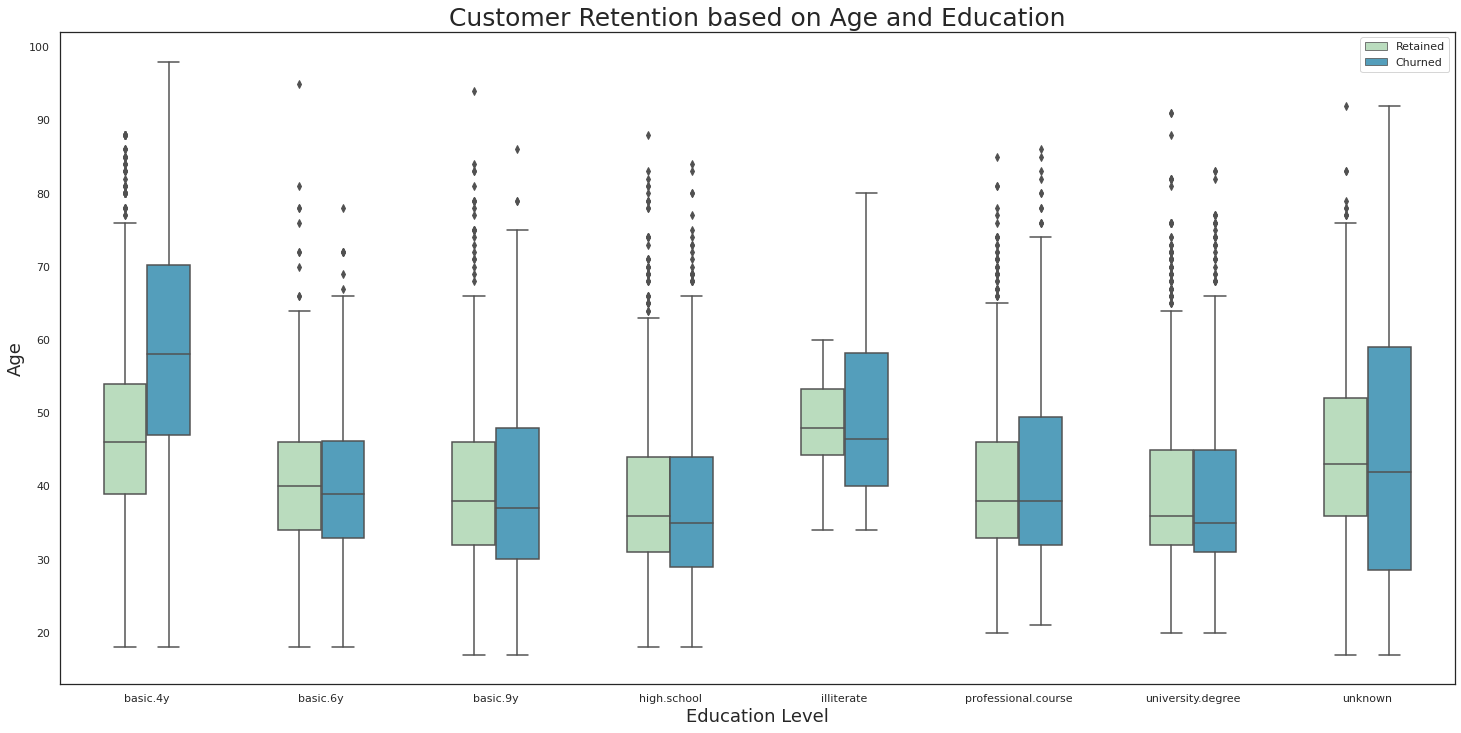

In [10]:
#Customer Retention Based on Age and Education
sns.set(style="white")
plt.figure(figsize=(25,12))
ax = sns.boxplot(x="education", y='age', hue="y", data=data, palette="GnBu", width=0.5)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ["Retained", "Churned"])
ax.set_title('Customer Retention based on Age and Education',fontsize=25)
ax.set_xlabel('Education Level', fontsize=18)
ax.set_ylabel('Age', fontsize=18)
plt.show()

StatementMeta(SparkChurn, 85, 11, Finished, Available)

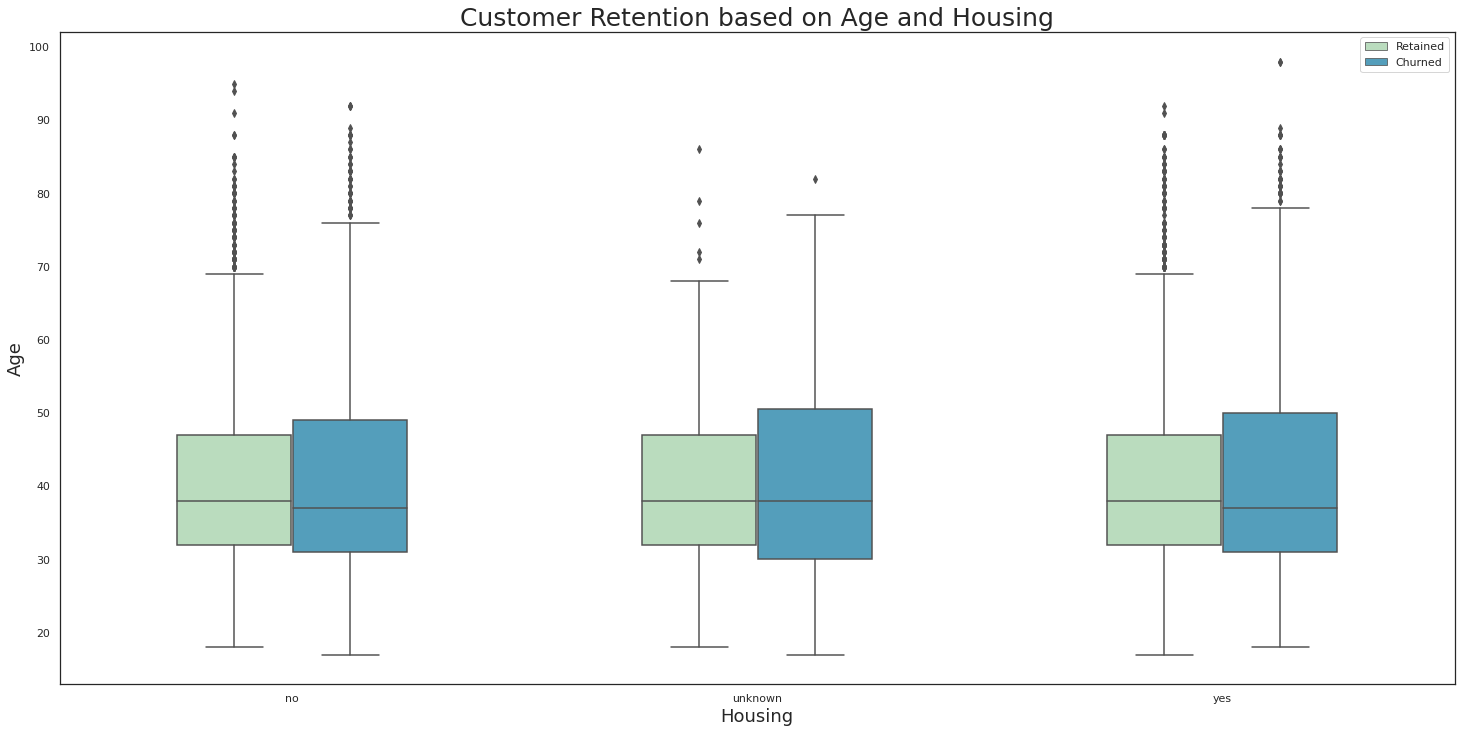

In [11]:
#Customer Retention Based on Age and Housing
sns.set(style="white")
plt.figure(figsize=(25,12))
ax = sns.boxplot(x="housing", y='age', hue="y", data=data, palette="GnBu", width=0.5)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ["Retained", "Churned"])
ax.set_title('Customer Retention based on Age and Housing',fontsize=25)
ax.set_xlabel('Housing', fontsize=18)
ax.set_ylabel('Age', fontsize=18)
plt.show()

## Categorical Distributions

The following graphs use different features (categories) to segment our customers.  We do this to see if we can find anything insightful or meaningful before we build our model(s).

StatementMeta(SparkChurn, 85, 12, Finished, Available)

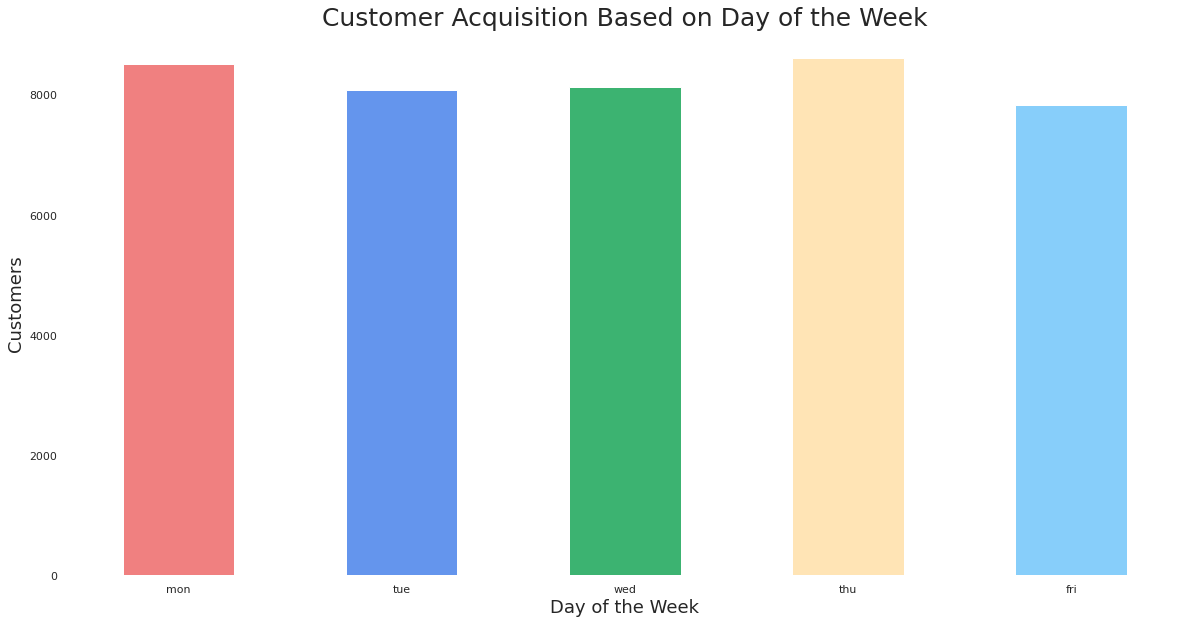

In [12]:
#This graph breaks represents what day of the week customers were acquiried on.
days = ["mon", "tue", "wed", "thu", "fri"] #Create list for days of the week.  This will be x-axis
data['day_of_week'] = pd.Categorical(data.day_of_week, categories=days, ordered=True)
plt.figure(figsize=(20,10))
GroupedData=data.groupby(by='day_of_week').size() #Group data by value
sns.despine()
colors = ['lightcoral','cornflowerblue','mediumseagreen','moccasin','lightskyblue','plum','lightgray','khaki'] #Set color palette
ax = GroupedData.plot.bar(color=colors) #Plot values in a bar chart
sns.despine(left=True,bottom=True)
ax.set_title('Customer Acquisition Based on Day of the Week',fontsize=25)
ax.set_xlabel('Day of the Week', fontsize=18)
ax.set_ylabel('Customers', fontsize=18)

plt.xticks(rotation=0) #Make bar chart vertical
plt.show()

StatementMeta(SparkChurn, 85, 13, Finished, Available)

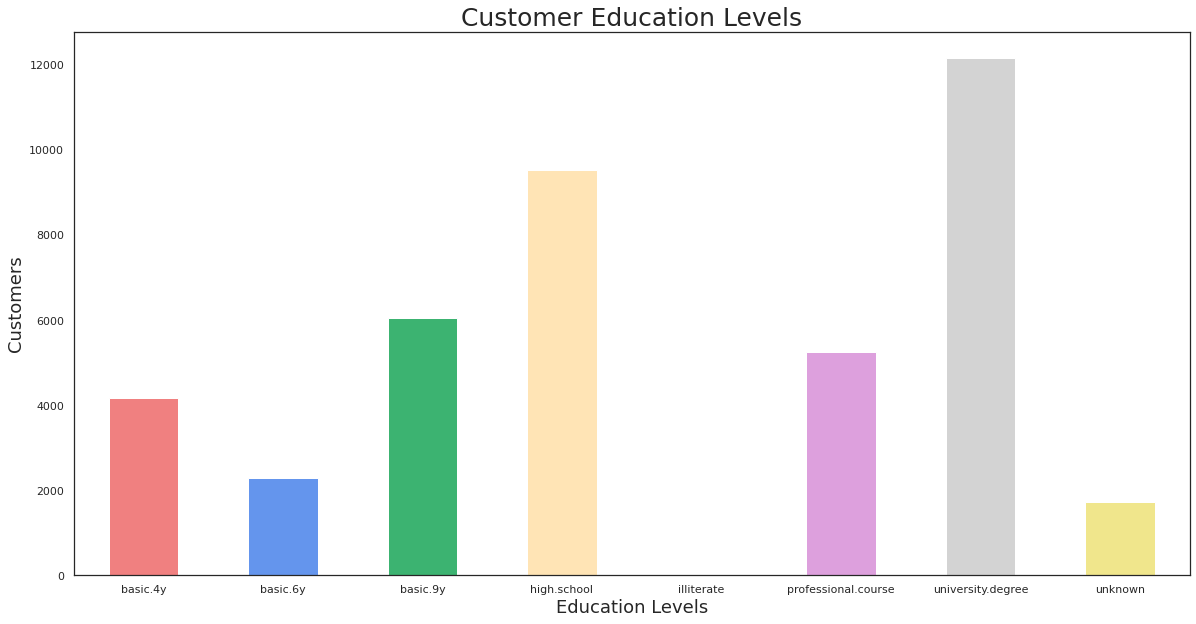

In [13]:
#Education distribution

plt.figure(figsize=(20,10))#figure size
sns.despine()

GroupedData=data.groupby(by='education').size()#grouping values
sns.despine(left=True,bottom=True)
colors = ['lightcoral','cornflowerblue','mediumseagreen','moccasin','lightskyblue','plum','lightgray','khaki']#color palette
ax = GroupedData.plot.bar(color=colors)#plotting bar chart
ax.set_title('Customer Education Levels',fontsize=25)
ax.set_xlabel('Education Levels', fontsize=18)
ax.set_ylabel('Customers', fontsize=18)

plt.xticks(rotation=0)
plt.show()

StatementMeta(SparkChurn, 85, 14, Finished, Available)

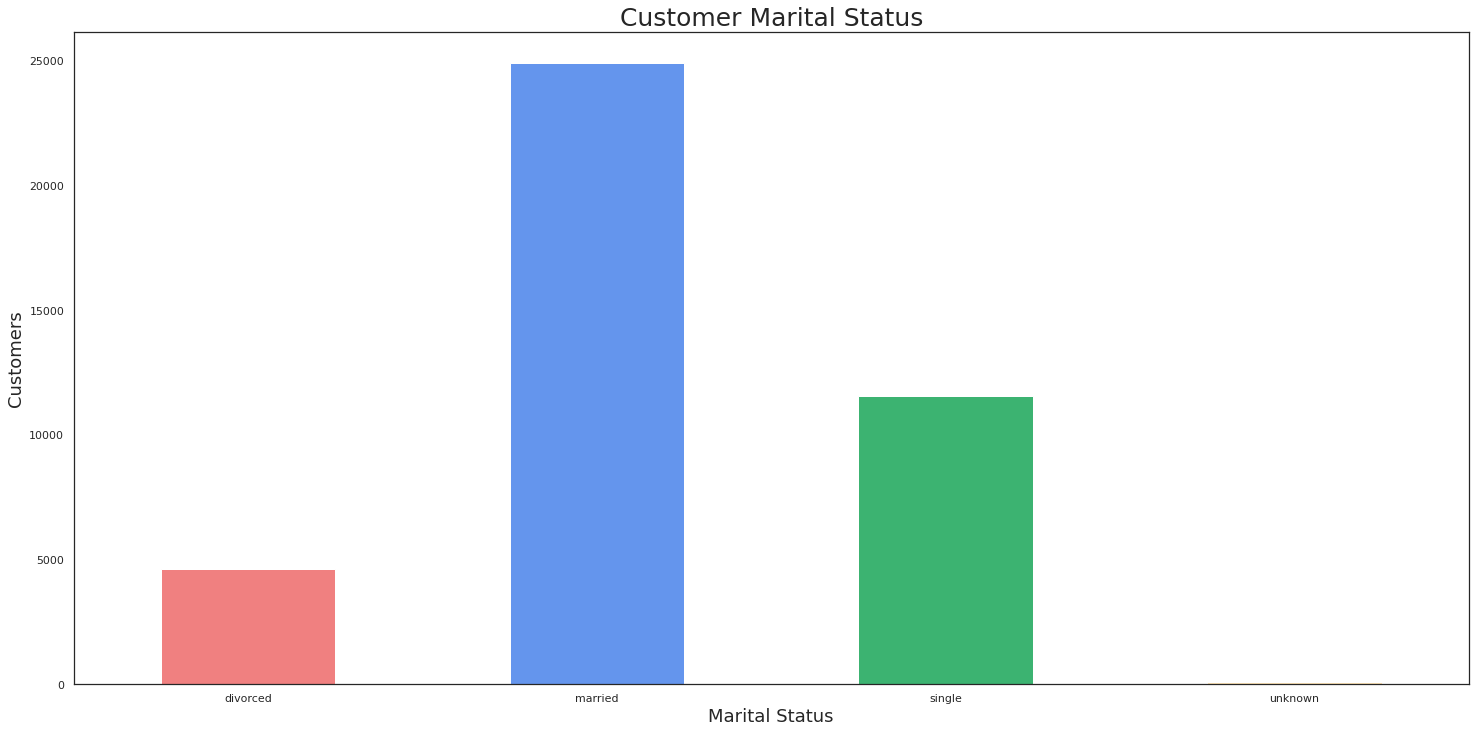

In [14]:
#Marital Status distribution
plt.figure(figsize=(25,12)) #figure size
sns.despine()
colors = ['lightcoral','cornflowerblue','mediumseagreen','moccasin','lightskyblue','plum','lightgray','khaki']#color palette
GroupedData=data.groupby(by='marital').size() #grouping by values
sns.despine(left=True,bottom=True)
ax = GroupedData.plot.bar(color=colors) #make bar chart
ax.set_title('Customer Marital Status',fontsize=25)
ax.set_xlabel('Marital Status', fontsize=18)
ax.set_ylabel('Customers', fontsize=18)
plt.xticks(rotation=0)
plt.show() #display bar chart

StatementMeta(SparkChurn, 85, 15, Finished, Available)

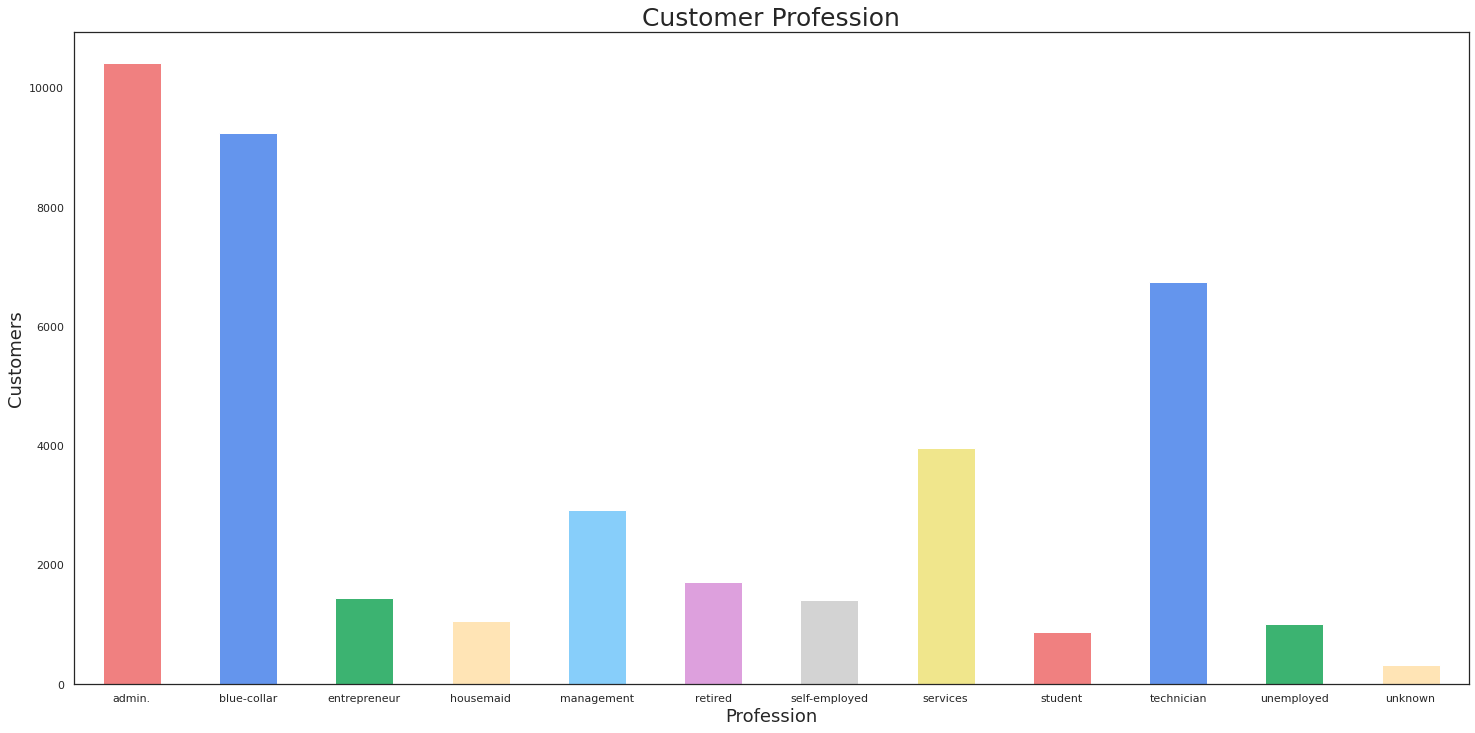

In [15]:
#Job level distribution

plt.figure(figsize=(25,12)) #graph size
sns.despine()
colors = ['lightcoral','cornflowerblue','mediumseagreen','moccasin','lightskyblue','plum','lightgray','khaki'] #colors
GroupedData=data.groupby(by='job').size() #grouping by values
sns.despine(left=True,bottom=True)
ax = GroupedData.plot.bar(color=colors) #plotting grouped values
ax.set_title('Customer Profession',fontsize=25)
ax.set_xlabel('Profession', fontsize=18)
ax.set_ylabel('Customers', fontsize=18)

plt.xticks(rotation=0)
plt.show() #displaying chart


## Correlation matrix

We use a correlation matrix to find relationships between numerical variables.  This helps us decide which variables to keep and which to eliminate before we build our model(s).

StatementMeta(SparkChurn, 85, 16, Finished, Available)

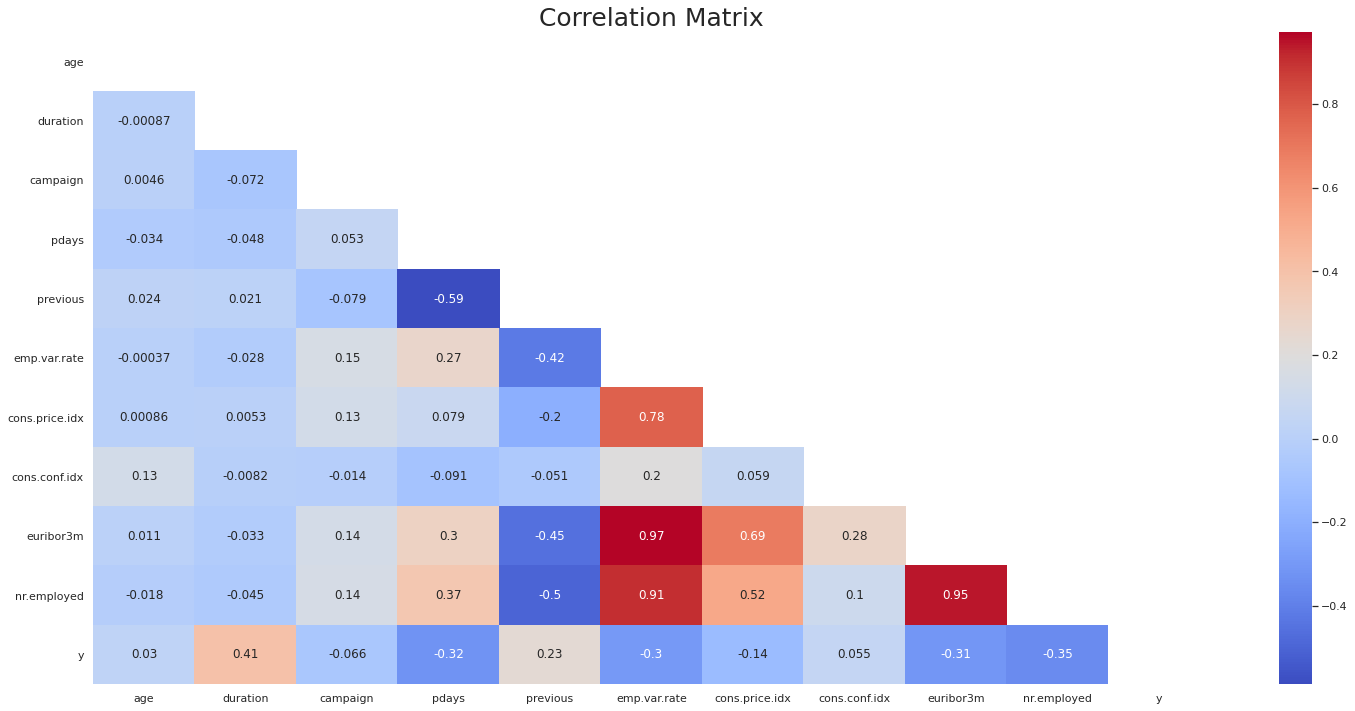

In [16]:
# Numerical columns correlation matrix
sns.set(style="white") #background color
plt.subplots(figsize=(25,12)) #graph size
matrix = np.triu(data.corr()) #build matrix
ax = sns.heatmap(data.corr(), annot=True, mask=matrix,cmap= 'coolwarm') #create heatmap and choose color palette
ax.set_title('Correlation Matrix',fontsize=25) #title
plt.show() #show matrix

## Customer Churn

These remaining charts look at customer churn based on a single feature.  This will tell us if a certain feature is making it more likely that certain customers churn.  
If there is a correlation, that will help us in predicting churn in the future.


StatementMeta(SparkChurn, 85, 17, Finished, Available)

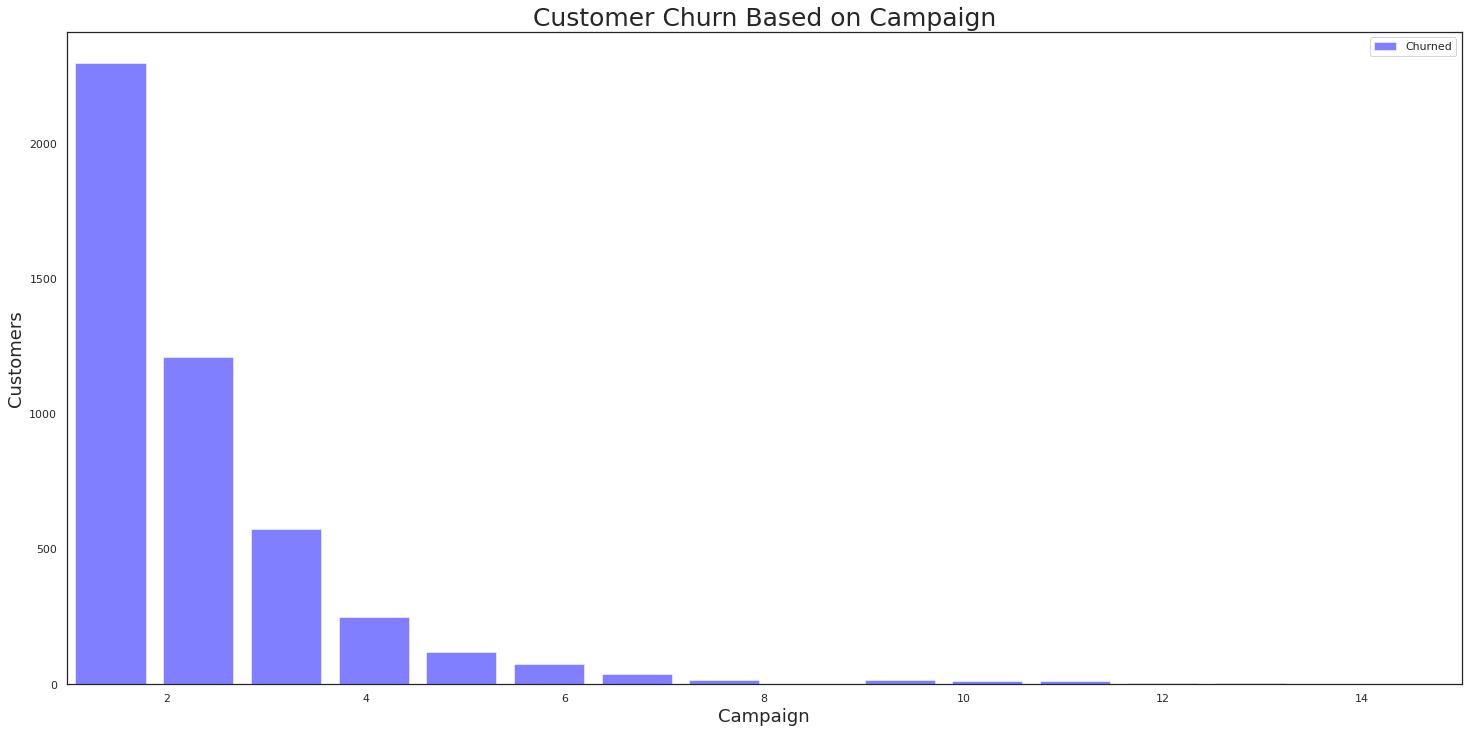

In [17]:
fig, ax = plt.subplots(figsize=(25,12)) #build plot and set size

ax.hist(data[data["y"]==1]["campaign"], bins=25, alpha=0.5, rwidth=.8, color="blue", label="Churned") #create histogram based on our target variable (churn) and campaign

ax.set_title('Customer Churn Based on Campaign',fontsize=25) #title and axis labels
ax.set_xlabel('Campaign', fontsize=18)
ax.set_ylabel('Customers', fontsize=18)

ax.legend();
plt.xlim([1, 15]) #set x-axis range
plt.show() #show graph

StatementMeta(SparkChurn, 85, 18, Finished, Available)

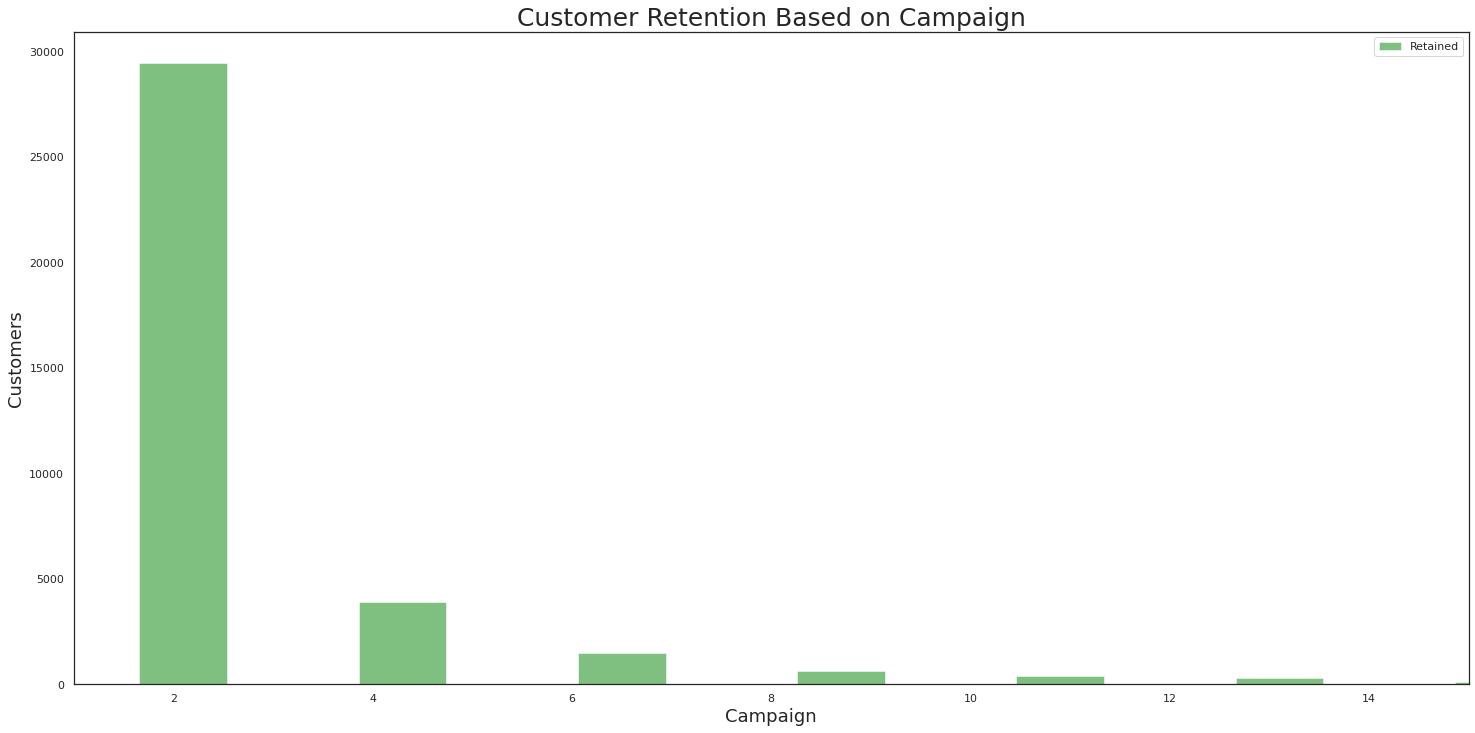

In [18]:
fig, ax = plt.subplots(figsize=(25,12)) #create plot and set size

ax.hist(data[data["y"]==0]["campaign"], bins=25, alpha=0.5, rwidth=.4, color="green", label="Retained") #create histogram based on our target variable (retention) and campaign

ax.set_title('Customer Retention Based on Campaign',fontsize=25) #axis and title labels
ax.set_xlabel('Campaign', fontsize=18)
ax.set_ylabel('Customers', fontsize=18)

ax.legend(); #legend
plt.xlim([1, 15]) #x-axis range
plt.show() #show plot

## Customer Churn & Retention Density Plot

The following chart is a depiction of the employment variation rate with respect to customer retention/churn.  Employment variation rate is an external factor and is therefore out of our control.  However, it still may be correlated to customer churn and therefore must be considered.  If a strong correlation is found, we can use this number in the future to help predict churn. We can use this type of chart for other external (and internal) variables as well.

StatementMeta(SparkChurn, 85, 19, Finished, Available)

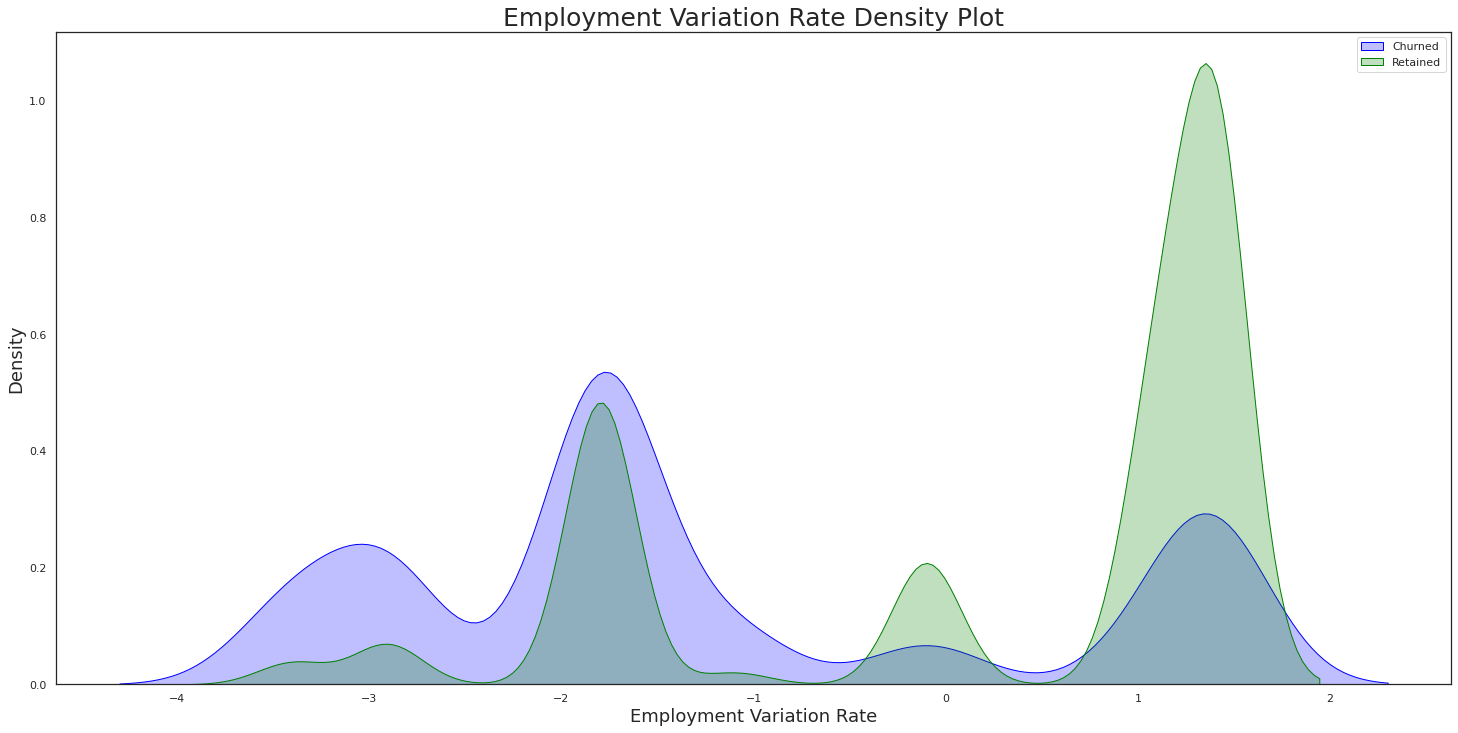

In [19]:
fig, ax = plt.subplots(figsize=(25,12)) #create subplot and set size

sns.kdeplot(data[data["y"]==1]["emp.var.rate"], shade=True, color="blue", label="Churned", ax=ax) #create churn plot, color and set transparency so both are visible when overlaid
sns.kdeplot(data[data["y"]==0]["emp.var.rate"], shade=True, color="green", label="Retained", ax=ax) #same as above but for retention

ax.set_title('Employment Variation Rate Density Plot',fontsize=25) #set title and aixs labels
ax.set_xlabel("Employment Variation Rate", fontsize=18)
ax.set_ylabel('Density', fontsize=18)

ax.legend(); #show legend
plt.show() #plot graph

StatementMeta(SparkChurn, 85, 20, Finished, Available)

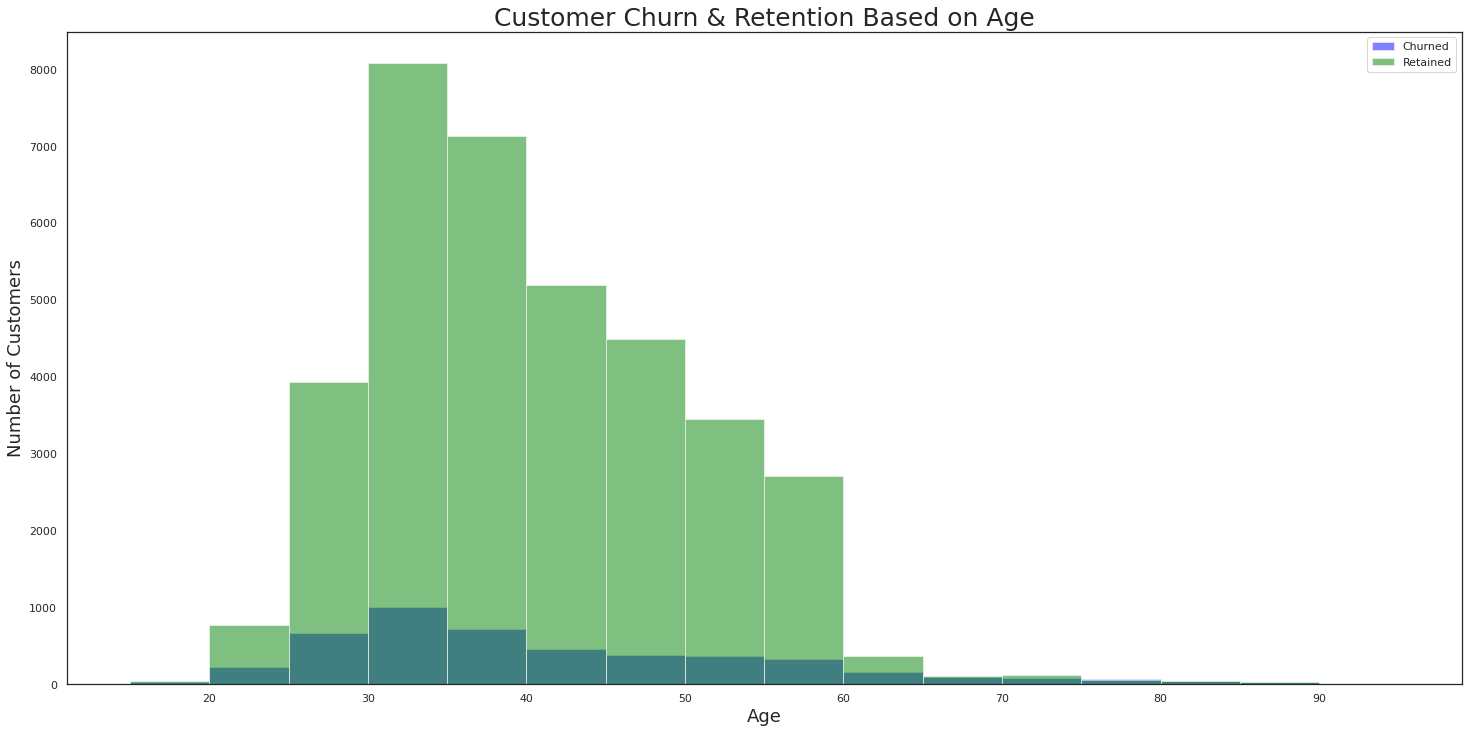

In [20]:
fig, ax = plt.subplots(figsize=(25,12)) #create figure and set size

ax.hist(data[data["y"]==1]["age"], bins=(15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95), alpha=0.5, color="blue", label="Churned") # plot churn data and set bin size (every 5 years)
ax.hist(data[data["y"]==0]["age"], bins=(15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95), alpha=0.5, color="green", label="Retained") # plot churn data and set bin size (every 5 years)

ax.set_title('Customer Churn & Retention Based on Age',fontsize=25) #set title and aixs labels
ax.set_xlabel("Age", fontsize=18)
ax.set_ylabel('Number of Customers', fontsize=18)

ax.legend();
plt.show() #show plot

In [21]:
# Converting to nan since we need to find the mean and that cannot be computed with an empty string. It can be computed using Nan 
data.replace("unknown", np.nan, inplace=True) 

# Now we know that total charges has nan values
data.isna().sum()

StatementMeta(SparkChurn, 85, 21, Finished, Available)

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [22]:
# Defining a function to encode categorical variables
from sklearn.preprocessing import LabelEncoder

def labelencoder(column):
    transform = LabelEncoder()
    data[column] = transform.fit_transform(data[column]) 

StatementMeta(SparkChurn, 85, 22, Finished, Available)

In [23]:
# Applying encoding function to select categorical features
names = ['marital', 'housing', 'loan', 'contact']
for column in names:
    data[column] = data[column].astype(str)
    labelencoder(column)

StatementMeta(SparkChurn, 85, 23, Finished, Available)

In [24]:
# Converting selected columns to dummy variables
names = ['education', 'poutcome', 'job']
data = pd.get_dummies(data=data, columns=names)

StatementMeta(SparkChurn, 85, 24, Finished, Available)

In [25]:
# Dropping columns that don't seem relevant
data = data.drop(['default', 'day_of_week', 'duration', 'month', 'campaign', 'education_illiterate', 'job_housemaid', 'education_unknown', 'job_unknown'], axis=1)

StatementMeta(SparkChurn, 85, 25, Finished, Available)

In [26]:
show = data.tail(5)
display(show)

StatementMeta(SparkChurn, 85, 26, Finished, Available)

SynapseWidget(Synapse.DataFrame, a0401ed8-ce34-4fd9-8f85-6c7a23ffd049)


/opt/spark/python/lib/pyspark.zip/pyspark/sql/session.py:714: UserWarning: createDataFrame attempted Arrow optimization because 'spark.sql.execution.arrow.enabled' is set to true; however, failed by the reason below:
  Unsupported type in conversion from Arrow: uint8
Attempting non-optimization as 'spark.sql.execution.arrow.fallback.enabled' is set to true.

In [27]:
data.columns

StatementMeta(SparkChurn, 85, 27, Finished, Available)

Index(['age', 'marital', 'housing', 'loan', 'contact', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school',
       'education_professional.course', 'education_university.degree',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_management',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed'],
      dtype='object')

In [29]:
# Saving feature engineered dataset for use in model building

output = data.to_csv (index=False, header=True, encoding = "utf-8")
blobName = "retail_banking_customer_churn_for_model.csv"
blob = BlobClient.from_connection_string(conn_str=CONNECTIONSTRING, container_name=CONTAINER_NAME, blob_name=blobName)
try:
    blob.upload_blob(output)
except: 
    print("Blob already exists, no need to update")

StatementMeta(SparkChurn, 85, 29, Finished, Available)

Blob already exists, no need to update